Rows after dropna: 184263
  classification  Closed PnL
0          Greed         0.0
1          Greed         0.0
2          Greed         0.0
3          Greed         0.0
4          Greed         0.0


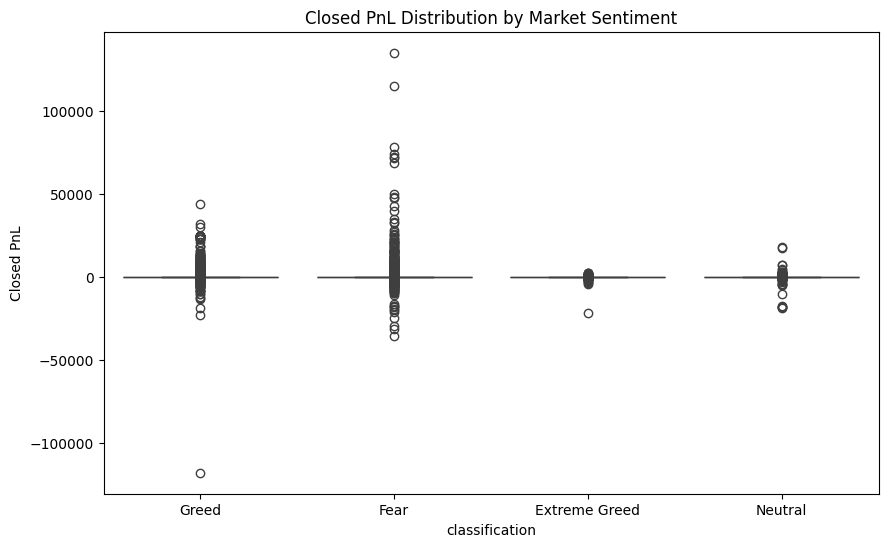

In [ ]:

import pandas as pd
import os

os.makedirs("outputs", exist_ok=True)
os.makedirs("csv_files", exist_ok=True)

sentiment_url = "https://drive.google.com/uc?id=1PgQC0tO8XN-wqkNyghWc_-mnrYv_nhSf"
trades_url = "https://drive.google.com/uc?id=1IAfLZwu6rJzyWKgBToqwSmmVYU6VbjVs"

sentiment_df = pd.read_csv(sentiment_url)
trades_df = pd.read_csv(trades_url)

sentiment_df['date_only'] = pd.to_datetime(sentiment_df['date']).dt.date
trades_df['Timestamp'] = pd.to_datetime(trades_df['Timestamp'], unit='ms', errors='coerce')
trades_df['date_only'] = trades_df['Timestamp'].dt.date

# Merge on date_only
merged_df = pd.merge(trades_df, sentiment_df, left_on='date_only', right_on='date_only', how='left')

# Drop rows with no classification (optional, for plotting)
plot_df = merged_df.dropna(subset=['classification'])

# Check data
print("Rows after dropna:", len(plot_df))
print(plot_df[['classification', 'Closed PnL']].head())

# Plot Closed PnL by classification
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.boxplot(data=plot_df, x='classification', y='Closed PnL')
plt.title("Closed PnL Distribution by Market Sentiment")
plt.savefig("outputs/pnl_by_sentiment.png")
plt.show()

In [ ]:
import os

os.makedirs("outputs", exist_ok=True)
os.makedirs("csv_files", exist_ok=True)

In [ ]:
trades_df['Timestamp'] = pd.to_datetime(trades_df['Timestamp'], unit='ms', errors='coerce')
trades_df['date_only'] = trades_df['Timestamp'].dt.date